# Clipping Streets and Exporting as a GeoJSON

Mark Bauer

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona
from fiona.crs import from_epsg

In [2]:
# read in boroughs shapefile
url = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=GeoJSON'
boros = gpd.read_file(url)

# convert to crs 2263
boros = boros.to_crs(epsg=2263)
boros.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5,Staten Island,1623631283.36,325924.002076,"MULTIPOLYGON (((970217.085 145643.397, 970227...."
1,2,Bronx,1187189499.3,463277.240478,"MULTIPOLYGON (((1012821.787 229228.479, 101278..."
2,1,Manhattan,636605816.437,359103.151368,"MULTIPOLYGON (((981219.022 188655.462, 980940...."
3,3,Brooklyn,1934169228.83,728478.125489,"MULTIPOLYGON (((1022227.393 152028.338, 102207..."
4,4,Queens,3041397430.33,888238.562635,"MULTIPOLYGON (((1032452.096 154469.461, 103245..."


<AxesSubplot:>

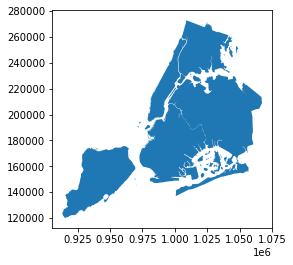

In [3]:
boros.plot()

In [4]:
# read in streets segments shapefile
url = 'https://data.cityofnewyork.us/api/geospatial/exjm-f27b?method=export&format=GeoJSON'
streets = gpd.read_file(url)

# convert to crs 2263
streets = streets.to_crs(epsg=2263)
streets.head()

,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,snow_pri,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry
0,1,50,None,42.0,10280,51,None,PL,1222601917,None,...,C,1,TW,None,BATTERY PL,3,BATTERY,2007-11-29,64,"MULTILINESTRING ((979278.595 196555.690, 97929..."
1,1,66,None,42.0,10280,65,None,PL,1222604562,None,...,C,1,TW,None,BATTERY PL,5,BATTERY,2007-11-29,82,"MULTILINESTRING ((979377.413 196797.951, 97950..."
2,1,84,None,42.0,10280,83,None,PL,1222600933,None,...,C,1,TW,None,BATTERY PL,6,BATTERY,2007-11-29,98,"MULTILINESTRING ((979503.289 197024.782, 97964..."
3,1,None,None,42.0,10280,None,None,PL,1222600931,None,...,C,1,TW,None,BATTERY PL,8,BATTERY,2007-11-29,None,"MULTILINESTRING ((979553.746 196059.826, 97952..."
4,1,None,None,24.0,10004,None,None,PL,212262395,None,...,C,1,TF,None,BATTERY PL,14,BATTERY,2011-04-22,None,"MULTILINESTRING ((980288.092 195963.182, 98026..."


In [5]:
streets.shape

(120884, 32)

<AxesSubplot:>

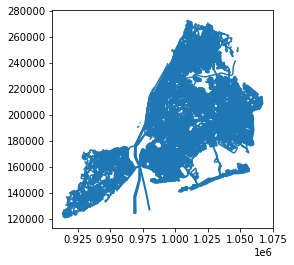

In [6]:
streets.plot()

In [7]:
streets.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 120884 entries, 0 to 120883
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   rw_type     120884 non-null  object        
 1   l_low_hn    84331 non-null   object        
 2   pre_direct  9987 non-null    object        
 3   st_width    120884 non-null  object        
 4   r_zip       119584 non-null  object        
 5   r_low_hn    84331 non-null   object        
 6   bike_lane   15207 non-null   object        
 7   post_type   107811 non-null  object        
 8   r_blkfc_id  120884 non-null  object        
 9   bike_trafd  15206 non-null   object        
 10  frm_lvl_co  120884 non-null  object        
 11  post_modif  732 non-null     object        
 12  pre_type    2888 non-null    object        
 13  full_stree  120884 non-null  object        
 14  l_blkfc_id  120884 non-null  object        
 15  shape_leng  120884 non-null  object        

In [8]:
# mappping street type codes to names
streets['rw_type_name'] = streets['rw_type'].map(
    
{
'1':'Street',
'2':'Highway',
'3':'Bridge',
'4':'Tunnel',
'5':'Boardwalk',
'6':'Path/Trail',
'7':'StepStreet',
'8':'Driveway',
'9':'Ramp',
'10':'Alley',
'11':'Unknown',
'12':'Non-Physical Street Segment',
'13':'U Turn',
'14':'Ferry Route'
})

streets.head()

,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry,rw_type_name
0,1,50,None,42.0,10280,51,None,PL,1222601917,None,...,1,TW,None,BATTERY PL,3,BATTERY,2007-11-29,64,"MULTILINESTRING ((979278.595 196555.690, 97929...",Street
1,1,66,None,42.0,10280,65,None,PL,1222604562,None,...,1,TW,None,BATTERY PL,5,BATTERY,2007-11-29,82,"MULTILINESTRING ((979377.413 196797.951, 97950...",Street
2,1,84,None,42.0,10280,83,None,PL,1222600933,None,...,1,TW,None,BATTERY PL,6,BATTERY,2007-11-29,98,"MULTILINESTRING ((979503.289 197024.782, 97964...",Street
3,1,None,None,42.0,10280,None,None,PL,1222600931,None,...,1,TW,None,BATTERY PL,8,BATTERY,2007-11-29,None,"MULTILINESTRING ((979553.746 196059.826, 97952...",Street
4,1,None,None,24.0,10004,None,None,PL,212262395,None,...,1,TF,None,BATTERY PL,14,BATTERY,2011-04-22,None,"MULTILINESTRING ((980288.092 195963.182, 98026...",Street


In [9]:
streets['rw_type_name'].value_counts()

Street                         99403
Path/Trail                      5299
Highway                         4111
Alley                           3834
Ramp                            3555
Bridge                          2691
Driveway                         775
Ferry Route                      423
U Turn                           322
StepStreet                       191
Tunnel                           174
Boardwalk                        102
Non-Physical Street Segment        4
Name: rw_type_name, dtype: int64

In [10]:
# we are only interested in streets for this project
streets = streets.loc[streets['rw_type'].isin(['1'])]
streets = streets.reset_index(drop=True)

streets.head()

,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry,rw_type_name
0,1,50,None,42.0,10280,51,None,PL,1222601917,None,...,1,TW,None,BATTERY PL,3,BATTERY,2007-11-29,64,"MULTILINESTRING ((979278.595 196555.690, 97929...",Street
1,1,66,None,42.0,10280,65,None,PL,1222604562,None,...,1,TW,None,BATTERY PL,5,BATTERY,2007-11-29,82,"MULTILINESTRING ((979377.413 196797.951, 97950...",Street
2,1,84,None,42.0,10280,83,None,PL,1222600933,None,...,1,TW,None,BATTERY PL,6,BATTERY,2007-11-29,98,"MULTILINESTRING ((979503.289 197024.782, 97964...",Street
3,1,None,None,42.0,10280,None,None,PL,1222600931,None,...,1,TW,None,BATTERY PL,8,BATTERY,2007-11-29,None,"MULTILINESTRING ((979553.746 196059.826, 97952...",Street
4,1,None,None,24.0,10004,None,None,PL,212262395,None,...,1,TF,None,BATTERY PL,14,BATTERY,2011-04-22,None,"MULTILINESTRING ((980288.092 195963.182, 98026...",Street


In [11]:
streets['rw_type_name'].value_counts()

Street    99403
Name: rw_type_name, dtype: int64

<AxesSubplot:>

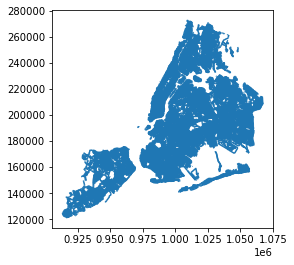

In [12]:
streets.plot()

In [13]:
streets.geom_type.value_counts()

MultiLineString    99403
dtype: int64

In [14]:
# clipping the streets that only fall within the boro shapes
streets_clipped = gpd.clip(streets, boros)

streets_clipped.geom_type.value_counts()

LineString            99304
MultiLineString          53
GeometryCollection       33
Point                     6
dtype: int64

In [15]:
streets_clipped = streets_clipped.loc[streets_clipped.geom_type == 'LineString']
streets_clipped = streets_clipped.reset_index(drop=True)

streets_clipped.geom_type.value_counts()

LineString    99304
dtype: int64

In [16]:
# printing the columns of our dataframe
streets_clipped.columns

Index(['rw_type', 'l_low_hn', 'pre_direct', 'st_width', 'r_zip', 'r_low_hn',
       'bike_lane', 'post_type', 'r_blkfc_id', 'bike_trafd', 'frm_lvl_co',
       'post_modif', 'pre_type', 'full_stree', 'l_blkfc_id', 'shape_leng',
       'to_lvl_co', 'modified', 'status', 'post_direc', 'r_high_hn', 'l_zip',
       'snow_pri', 'borocode', 'trafdir', 'pre_modifi', 'st_label',
       'physicalid', 'st_name', 'created', 'l_high_hn', 'geometry',
       'rw_type_name'],
      dtype='object')

In [17]:
streets_clipped.iloc[:, 15:].head()

,shape_leng,to_lvl_co,modified,status,post_direc,r_high_hn,l_zip,snow_pri,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry,rw_type_name
0,548.729075096,13,2017-03-17,2,None,0,11362,C,4,TF,None,HORACE HARDING EXPY,84465,HORACE HARDING,2007-11-29,259-099,"LINESTRING (1060631.736 217950.913, 1060738.20...",Street
1,215.574595282,13,2020-07-27,2,None,0,11362,C,4,TF,None,HORACE HARDING EXPY,84466,HORACE HARDING,2007-11-29,260-099,"LINESTRING (1061173.082 218033.685, 1061388.33...",Street
2,643.00321787,13,2017-03-17,2,None,55-098,11362,S,4,TW,None,260 ST,93517,260,2007-11-29,55-099,"LINESTRING (1060672.680 218437.479, 1061173.08...",Street
3,255.104395441,13,2020-08-28,2,None,243-098,11362,S,4,TW,None,VAN ZANDT AVE,83218,VAN ZANDT,2007-11-29,243-099,"LINESTRING (1056052.382 216693.779, 1056282.58...",Street
4,65.6129566765,13,2022-03-11,2,None,248-098,11362,V,4,FT,None,54 AVE,189609,54,2007-11-29,248-099,"LINESTRING (1058129.018 216729.348, 1058126.87...",Street


In [18]:
streets_clipped = streets_clipped[['physicalid', 
                                   'st_label',
                                   'st_name',
                                   'full_stree',
                                   'rw_type', 
                                   'rw_type_name',  
                                   'st_width',
                                   'frm_lvl_co', 
                                   'to_lvl_co', 
                                   'borocode', 
                                   'shape_leng',
                                   'geometry']]

streets_clipped.head()

,physicalid,st_label,st_name,full_stree,rw_type,rw_type_name,st_width,frm_lvl_co,to_lvl_co,borocode,shape_leng,geometry
0,84465,HORACE HARDING EXPY,HORACE HARDING,HORACE HARDING EXPY,1,Street,35.0,13,13,4,548.729075096,"LINESTRING (1060631.736 217950.913, 1060738.20..."
1,84466,HORACE HARDING EXPY,HORACE HARDING,HORACE HARDING EXPY,1,Street,35.0,13,13,4,215.574595282,"LINESTRING (1061173.082 218033.685, 1061388.33..."
2,93517,260 ST,260,260 ST,1,Street,40.0,13,13,4,643.00321787,"LINESTRING (1060672.680 218437.479, 1061173.08..."
3,83218,VAN ZANDT AVE,VAN ZANDT,VAN ZANDT AVE,1,Street,30.0,13,13,4,255.104395441,"LINESTRING (1056052.382 216693.779, 1056282.58..."
4,189609,54 AVE,54,54 AVE,1,Street,30.0,13,13,4,65.6129566765,"LINESTRING (1058129.018 216729.348, 1058126.87..."


In [19]:
streets_clipped['shape_leng'] = streets_clipped.length

streets_clipped[['shape_leng']].describe()

,shape_leng
count,9.930400e+04
mean,3.428016e+02
std,2.608382e+02
min,3.409821e-08
25%,1.952331e+02
50%,2.648018e+02
75%,4.577397e+02
max,1.509363e+04


array([[<AxesSubplot:title={'center':'shape_leng'}>]], dtype=object)

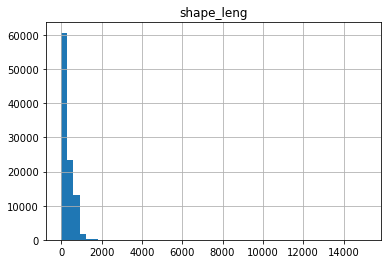

In [20]:
streets_clipped[['shape_leng']].hist(bins=50)

In [21]:
streets_clipped.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 99304 entries, 0 to 99303
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   physicalid    99304 non-null  object  
 1   st_label      99304 non-null  object  
 2   st_name       99304 non-null  object  
 3   full_stree    99304 non-null  object  
 4   rw_type       99304 non-null  object  
 5   rw_type_name  99304 non-null  object  
 6   st_width      99304 non-null  object  
 7   frm_lvl_co    99304 non-null  object  
 8   to_lvl_co     99304 non-null  object  
 9   borocode      99304 non-null  object  
 10  shape_leng    99304 non-null  float64 
 11  geometry      99304 non-null  geometry
dtypes: float64(1), geometry(1), object(10)
memory usage: 9.1+ MB


In [22]:
streets_clipped.shape

(99304, 12)

In [23]:
streets_clipped.to_file("data/streets-clipped.json", driver="GeoJSON")

Sanity check

In [24]:
path = 'data/streets-clipped.json'
streets = gpd.read_file(path)

print(streets.shape)
streets.head()

(99304, 12)


,physicalid,st_label,st_name,full_stree,rw_type,rw_type_name,st_width,frm_lvl_co,to_lvl_co,borocode,shape_leng,geometry
0,84465,HORACE HARDING EXPY,HORACE HARDING,HORACE HARDING EXPY,1,Street,35.0,13,13,4,548.727854,"LINESTRING (1060631.736 217950.913, 1060738.20..."
1,84466,HORACE HARDING EXPY,HORACE HARDING,HORACE HARDING EXPY,1,Street,35.0,13,13,4,215.574129,"LINESTRING (1061173.082 218033.685, 1061388.33..."
2,93517,260 ST,260,260 ST,1,Street,40.0,13,13,4,643.002280,"LINESTRING (1060672.680 218437.479, 1061173.08..."
3,83218,VAN ZANDT AVE,VAN ZANDT,VAN ZANDT AVE,1,Street,30.0,13,13,4,255.103799,"LINESTRING (1056052.382 216693.779, 1056282.58..."
4,189609,54 AVE,54,54 AVE,1,Street,30.0,13,13,4,65.588986,"LINESTRING (1058129.018 216729.348, 1058126.87..."
